# Galopp-EDA

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("csvs/participations.csv")
df.sample(3)

,Place,Horse_name,Jockey_name,Trainer_name,Weight,Date,Location,Distance,Prize,Ground_state
1586,7,belle zorro,oppermann,NaN,53.5,20/04/2013,magdeburg,1800,0,gut
30049,3,chicane (fr),minarik,NaN,56.5,27/09/2015,köln,1850,5100,weich
78722,2,notre ruler,delozier,schiergen,58.0,15/06/2020,münchen,2200,12500,weich


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84332 entries, 0 to 84331
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place         84332 non-null  int64  
 1   Horse_name    84332 non-null  object 
 2   Jockey_name   84203 non-null  object 
 3   Trainer_name  40440 non-null  object 
 4   Weight        84327 non-null  float64
 5   Date          84332 non-null  object 
 6   Location      84332 non-null  object 
 7   Distance      84332 non-null  int64  
 8   Prize         84332 non-null  int64  
 9   Ground_state  84273 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 6.4+ MB


In [4]:
# Change Date to a Datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.isna().sum()

Place               0
Horse_name          0
Jockey_name       129
Trainer_name    43892
Weight              5
Date                0
Location            0
Distance            0
Prize               0
Ground_state       59
dtype: int64

In [6]:
# Create 2 new features, if a horse was on place 1 or not and on place 1-3 or not.
df["Winner"] = (df["Place"]==1)
df["Winner"] = df["Winner"].astype("int32")

df["Top3"] = (df["Place"]<=3)
df["Top3"] = df["Top3"].astype("int32")

,Place,Horse_name,Jockey_name,Trainer_name,Weight,Date,Location,Distance,Prize,Ground_state,Winner,Top3
29466,5,liverbird,de vries,NaN,0.0,2015-09-13,münchen,1400,6000,gut,0,0


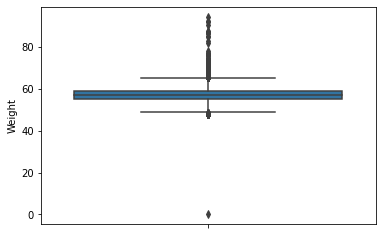

In [7]:
# Look at the weight distribution
# We clearly see some outliers above 65 and below 45, these need to be taken care of
sns.boxplot(y=df["Weight"])

# Lets see which Horse has the weights under 45
df[df["Weight"]<45]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84332 entries, 0 to 84331
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Place         84332 non-null  int64         
 1   Horse_name    84332 non-null  object        
 2   Jockey_name   84203 non-null  object        
 3   Trainer_name  40440 non-null  object        
 4   Weight        84327 non-null  float64       
 5   Date          84332 non-null  datetime64[ns]
 6   Location      84332 non-null  object        
 7   Distance      84332 non-null  int64         
 8   Prize         84332 non-null  int64         
 9   Ground_state  84273 non-null  object        
 10  Winner        84332 non-null  int32         
 11  Top3          84332 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(5)
memory usage: 7.1+ MB


In [9]:
# Seems like it is only 1, with the name "liverbird"
# Look for other occurences of liverbird
liverbird_df = df[df["Horse_name"]=="liverbird"]

# We can get a look at the weights of this specific horse.
# By looking sorting at the date, and selecting the recent 3 ones,
# we compute the mean and fill it in
liverbird_df = liverbird_df.sort_values(by="Date", ascending=False)
recent_mean = liverbird_df.iloc[:3, 4].mean()
df["Weight"] = df["Weight"].apply(lambda x: recent_mean if x == 0 else x)

In [10]:
df.isna().sum()

Place               0
Horse_name          0
Jockey_name       129
Trainer_name    43892
Weight              5
Date                0
Location            0
Distance            0
Prize               0
Ground_state       59
Winner              0
Top3                0
dtype: int64